<a href="https://colab.research.google.com/github/RayanToy/CreateBDForAdminVK/blob/main/%D0%90%D1%85%D0%BC%D0%B5%D1%82%D0%B7%D1%8F%D0%BD%D0%BE%D0%B2_%D0%A0%D1%83%D1%81%D1%82%D0%B5%D0%BC_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0%20_%D0%B7%D0%B2%D0%BE%D0%BD%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка и подключение к базе данных

In [ ]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Downloading...
From: https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0
To: /content/data.db
100% 16.0M/16.0M [00:00<00:00, 216MB/s]


In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:////content/data.db

%config SqlMagic.displaylimit = 52

Можно вывести список имеющихся таблиц в базе:

In [ ]:
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:////content/data.db
Done.


tbl_name,sql
mngmnt,"CREATE TABLE mngmnt ( org_management_rk BIGINT, management_nm TEXT)"
product,"CREATE TABLE product ( hit_rk BIGINT, hid BIGINT, using_flg FLOAT)"
queue,"CREATE TABLE queue ( queue_id BIGINT, queue_desc TEXT)"
result,"CREATE TABLE result ( hit_status_result_id BIGINT, hit_status_result_desc TEXT)"
horoscope,"CREATE TABLE horoscope ( agent_login TEXT, horoscope TEXT)"
group,"CREATE TABLE ""group"" ( org_group_rk BIGINT, org_management_rk BIGINT, group_nm TEXT)"
emp_x_org_gr,"CREATE TABLE emp_x_org_gr ( employee_rk BIGINT, org_group_rk BIGINT)"
task,"CREATE TABLE task ( task_rk BIGINT, task_stage_id FLOAT, source_system_cd TEXT, create_dttm TEXT, finish_dttm TEXT)"
action,"CREATE TABLE action ( hit_rk BIGINT, hit_status_result_id BIGINT)"
call,"CREATE TABLE call ( wo_hit_rk BIGINT, wo_task_rk BIGINT, wo_queue_id BIGINT, agent_login TEXT, wo_employee_rk BIGINT, finish_dttm TEXT, duratoin_sec TEXT)"


# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

**Вариант с сохранениями ключей**

In [ ]:
%%sql
SELECT
    t1.task_rk, t1.task_stage_id, t1.source_system_cd, t1.create_dttm, t1.finish_dttm,
    t2.wo_hit_rk, t2.wo_task_rk, t2.wo_queue_id, t2.agent_login, t2.wo_employee_rk, t2.finish_dttm as finish_dttm_end_talk, t2.duratoin_sec,
    t3.hit_rk, t3.hit_status_result_id,
    t4.hid, t4.using_flg,
    t5.employee_rk, t5.org_group_rk,
    t6.hit_status_result_desc,
    t7.queue_id, t7.queue_desc,
    t8.org_management_rk, t8.group_nm,
    t9.management_nm,
    t10.horoscope
FROM task t1
LEFT JOIN call t2 ON t1.task_rk = t2.wo_task_rk
LEFT JOIN action t3 ON t2.wo_hit_rk = t3.hit_rk
LEFT JOIN product t4 ON t3.hit_rk = t4.hit_rk
LEFT JOIN emp_x_org_gr t5 ON t2.wo_employee_rk = t5.employee_rk
LEFT JOIN result t6 ON t3.hit_status_result_id = t6.hit_status_result_id
LEFT JOIN queue t7 ON t2.wo_queue_id = t7.queue_id
LEFT JOIN "group" t8 ON t5.org_group_rk = t8.org_group_rk
LEFT JOIN mngmnt t9 ON t8.org_management_rk = t9.org_management_rk
LEFT JOIN horoscope t10 ON t2.agent_login = t10.agent_login;


 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm,wo_hit_rk,wo_task_rk,wo_queue_id,agent_login,wo_employee_rk,finish_dttm_end_talk,duratoin_sec,hit_rk,hit_status_result_id,hid,using_flg,employee_rk,org_group_rk,hit_status_result_desc,queue_id,queue_desc,org_management_rk,group_nm,management_nm,horoscope
15431250,18.0,FW,2022-08-25 09:05:53,None,38818264,15431250,14819,movakaro,44861024,2022-08-25 16:13:02,0,38818264,5,4,None,44861024,2752,Недозвон,14819,Очередь 40,1768,Группа 16,Управление КЦ Сезам,Дева
93508186,1.0,GI,2022-08-01 05:09:01,2022-08-02 13:35:02,75189482,93508186,14644,8306aava,95591109,2022-08-02 13:34:55,"19,46",75189482,1,4,None,95591109,2031,"Дозвон, Отказ",14644,Очередь 119,674,Группа 23,Управление КЦ Страница,Овен
357853,1.0,GI,2022-08-08 22:05:30,2022-08-08 22:07:32,93045223,357853,10405,8251nsma,96021109,2022-08-08 22:07:29,"80,75",93045223,1,3,None,96021109,3240,"Дозвон, Отказ",10405,Очередь 36,1621,Группа 36,Управление КЦ Чизан,Овен
95793266,1.0,GI,2022-08-04 10:42:46,2022-08-04 13:59:52,84718799,95793266,14941,9185avis,32681113,2022-08-04 13:59:51,"163,26",84718799,3,4,0.0,32681113,2814,"Дозвон, Успешно",14941,Очередь 25,1780,Группа 2,Управление КЦ Хирс,Дева
5014541,1.0,GI,2022-08-14 19:16:43,2022-08-15 11:12:14,9870229,5014541,14703,tevapasa,79631117,2022-08-15 11:12:08,"28,31",9870229,1,4,None,79631117,2138,"Дозвон, Отказ",14703,Очередь 129,1521,Группа 29,Управление КЦ Дирим,Дева
88979016,1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,75488035,88979016,14644,nayaivza,43761004,2022-08-02 15:41:28,"186,38",75488035,2,4,None,43761004,3233,"Дозвон, Перезвонить",14644,Очередь 119,687,Группа 18,Управление КЦ Верс,Телец
88979016,1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,78858102,88979016,14644,novaadtr,96391109,2022-08-03 10:49:20,"40,4",78858102,2,4,None,96391109,2097,"Дозвон, Перезвонить",14644,Очередь 119,687,Группа 19,Управление КЦ Верс,Весы
19952848,1.0,GI,2022-08-31 10:03:58,2022-09-19 16:35:01,52573771,19952848,10236,1825egva,85571118,2022-08-31 12:06:19,"118,93",52573771,2,3,None,85571118,3240,"Дозвон, Перезвонить",10236,Очередь 20,1621,Группа 36,Управление КЦ Чизан,Водолей
96182364,23.0,FW,2022-08-04 03:33:02,2022-08-04 06:23:21,82796932,96182364,13780,pyanekov,40958840,2022-08-04 06:23:21,"183,92",82796932,1,4,None,40958840,3244,"Дозвон, Отказ",13780,Очередь 64,1621,Группа 30,Управление КЦ Чизан,Весы
3805464,23.0,FW,2022-08-12 04:20:30,2022-08-23 11:24:32,24557882,3805464,14790,syanlfsa,29111072,2022-08-19 17:10:14,0,24557882,5,4,None,29111072,3240,Недозвон,14790,Очередь 23,1621,Группа 36,Управление КЦ Чизан,Рыбы


**Вариант без ключей**

In [ ]:
%%sql
SELECT
    t1.task_stage_id, t1.source_system_cd, t1.create_dttm, t1.finish_dttm,
    t2.agent_login, t2.finish_dttm as finish_dttm_end_talk, t2.duratoin_sec,
    t3.hit_status_result_id,
    t4.hid, t4.using_flg,
    t6.hit_status_result_desc,
    t7.queue_desc,
    t8.group_nm,
    t9.management_nm,
    t10.horoscope
FROM task t1
LEFT JOIN call t2 ON t1.task_rk = t2.wo_task_rk
LEFT JOIN action t3 ON t2.wo_hit_rk = t3.hit_rk
LEFT JOIN product t4 ON t3.hit_rk = t4.hit_rk
LEFT JOIN emp_x_org_gr t5 ON t2.wo_employee_rk = t5.employee_rk
LEFT JOIN result t6 ON t3.hit_status_result_id = t6.hit_status_result_id
LEFT JOIN queue t7 ON t2.wo_queue_id = t7.queue_id
LEFT JOIN "group" t8 ON t5.org_group_rk = t8.org_group_rk
LEFT JOIN mngmnt t9 ON t8.org_management_rk = t9.org_management_rk
LEFT JOIN horoscope t10 ON t2.agent_login = t10.agent_login;

 * sqlite:////content/data.db
Done.


task_stage_id,source_system_cd,create_dttm,finish_dttm,agent_login,finish_dttm_end_talk,duratoin_sec,hit_status_result_id,hid,using_flg,hit_status_result_desc,queue_desc,group_nm,management_nm,horoscope
18.0,FW,2022-08-25 09:05:53,None,movakaro,2022-08-25 16:13:02,0,5,4,None,Недозвон,Очередь 40,Группа 16,Управление КЦ Сезам,Дева
1.0,GI,2022-08-01 05:09:01,2022-08-02 13:35:02,8306aava,2022-08-02 13:34:55,"19,46",1,4,None,"Дозвон, Отказ",Очередь 119,Группа 23,Управление КЦ Страница,Овен
1.0,GI,2022-08-08 22:05:30,2022-08-08 22:07:32,8251nsma,2022-08-08 22:07:29,"80,75",1,3,None,"Дозвон, Отказ",Очередь 36,Группа 36,Управление КЦ Чизан,Овен
1.0,GI,2022-08-04 10:42:46,2022-08-04 13:59:52,9185avis,2022-08-04 13:59:51,"163,26",3,4,0.0,"Дозвон, Успешно",Очередь 25,Группа 2,Управление КЦ Хирс,Дева
1.0,GI,2022-08-14 19:16:43,2022-08-15 11:12:14,tevapasa,2022-08-15 11:12:08,"28,31",1,4,None,"Дозвон, Отказ",Очередь 129,Группа 29,Управление КЦ Дирим,Дева
1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,nayaivza,2022-08-02 15:41:28,"186,38",2,4,None,"Дозвон, Перезвонить",Очередь 119,Группа 18,Управление КЦ Верс,Телец
1.0,GI,2022-07-26 02:30:46,2022-08-17 16:13:47,novaadtr,2022-08-03 10:49:20,"40,4",2,4,None,"Дозвон, Перезвонить",Очередь 119,Группа 19,Управление КЦ Верс,Весы
1.0,GI,2022-08-31 10:03:58,2022-09-19 16:35:01,1825egva,2022-08-31 12:06:19,"118,93",2,3,None,"Дозвон, Перезвонить",Очередь 20,Группа 36,Управление КЦ Чизан,Водолей
23.0,FW,2022-08-04 03:33:02,2022-08-04 06:23:21,pyanekov,2022-08-04 06:23:21,"183,92",1,4,None,"Дозвон, Отказ",Очередь 64,Группа 30,Управление КЦ Чизан,Весы
23.0,FW,2022-08-12 04:20:30,2022-08-23 11:24:32,syanlfsa,2022-08-19 17:10:14,0,5,4,None,Недозвон,Очередь 23,Группа 36,Управление КЦ Чизан,Рыбы


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

## Общее количество звонков со статусом успешно

In [ ]:
%%sql
SELECT COUNT(hit_status_result_id) AS dialing_successful
FROM action
WHERE hit_status_result_id = 3;

 * sqlite:////content/data.db
Done.


dialing_successful
3310


## Продажная конверсия

In [ ]:
%%sql
SELECT COUNT(hit_status_result_id) AS dialing_refusal
FROM action
WHERE hit_status_result_id = 1;

 * sqlite:////content/data.db
Done.


dialing_refusal
18459


In [ ]:
Sales_Conversion = 3310/(3310+18459)
Sales_Conversion

0.15205108181358812

In [ ]:
%%sql
SELECT COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END) AS dialing_refusal,
       COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS dialing_successful,
       CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) AS Sales_Conversion
FROM action;

 * sqlite:////content/data.db
Done.


dialing_refusal,dialing_successful,Sales_Conversion
18459,3310,0.15205108181358812


## Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Для статуса «Дозвон, Успешно»

In [ ]:
%%sql
SELECT ROUND(AVG(call.duratoin_sec), 4) AS Average_duration
FROM action
LEFT JOIN call ON action.hit_rk = call.wo_hit_rk
WHERE hit_status_result_id = 3

 * sqlite:////content/data.db
Done.


Average_duration
109.687


Для статуса «Дозвон, Отказ»

In [ ]:
%%sql
SELECT ROUND(AVG(call.duratoin_sec),4) AS Average_duration
FROM action
LEFT JOIN call ON action.hit_rk = call.wo_hit_rk
WHERE hit_status_result_id = 1

 * sqlite:////content/data.db
Done.


Average_duration
111.9903


Можно заметить что длительность звонка не влияет на успешность звонка

# Задание 3.
Проанализируй базу данных на предмет каких-либо трендов, зон роста, аномалий и так далее. Все выводы предоставь в виде dashboards в excel. В качестве ответа на это задание необходимо предоставить отдельный excel файл.


## Проверим на ящике с усами гипотезу что длительность звонка действительно не влияет на успешность звонка.

In [ ]:
result = %sql SELECT hit_status_result_id, horoscope.horoscope, call.duratoin_sec FROM action LEFT JOIN call ON action.hit_rk = call.wo_hit_rk LEFT JOIN horoscope ON horoscope.agent_login = call.agent_login WHERE hit_status_result_id = 3 or hit_status_result_id = 1;

 * sqlite:////content/data.db
Done.


In [ ]:
df = result.DataFrame()

In [ ]:
df['duratoin_sec'] = df['duratoin_sec'].str.replace(',', '.').astype(float)

In [ ]:
df['duratoin_result'] = np.where(df['hit_status_result_id'] < 2, 'dialing_refusal', 'dialing_successful')

In [ ]:
df

,hit_status_result_id,horoscope,duratoin_sec,duratoin_result
0,1,Дева,123.98,dialing_refusal
1,3,Близнецы,77.32,dialing_successful
2,1,Стрелец,19.81,dialing_refusal
3,1,Дева,30.91,dialing_refusal
4,1,Дева,36.49,dialing_refusal
...,...,...,...,...
21764,1,Дева,17.23,dialing_refusal
21765,3,Близнецы,0.00,dialing_successful
21766,1,Телец,116.97,dialing_refusal
21767,1,Рыбы,183.86,dialing_refusal


In [ ]:
df.describe()

,hit_status_result_id,duratoin_sec
count,21769.000000,21769.000000
mean,1.304102,112.135936
std,0.718157,110.193266
min,1.000000,0.000000
25%,1.000000,59.340000
50%,1.000000,109.900000
75%,1.000000,160.990000
max,3.000000,5874.710000


Видно что существуют звонки больше полутора часа, проверим зависит ли успешность звонка для продолжительности звонка больше 5 минут

In [ ]:
df.dtypes

hit_status_result_id     int64
horoscope               object
duratoin_sec            object
duratoin.result         object
dtype: object

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = df[df['duratoin_sec'] > 600]

In [ ]:
count_3 = len(df[df['hit_status_result_id'] == 3])

In [ ]:
count_1 = len(df[df['hit_status_result_id'] == 1])

In [ ]:
ratio = count_3 / (count_3 + count_1)

print(f"Отношение: {ratio}")

Отношение: 0.125


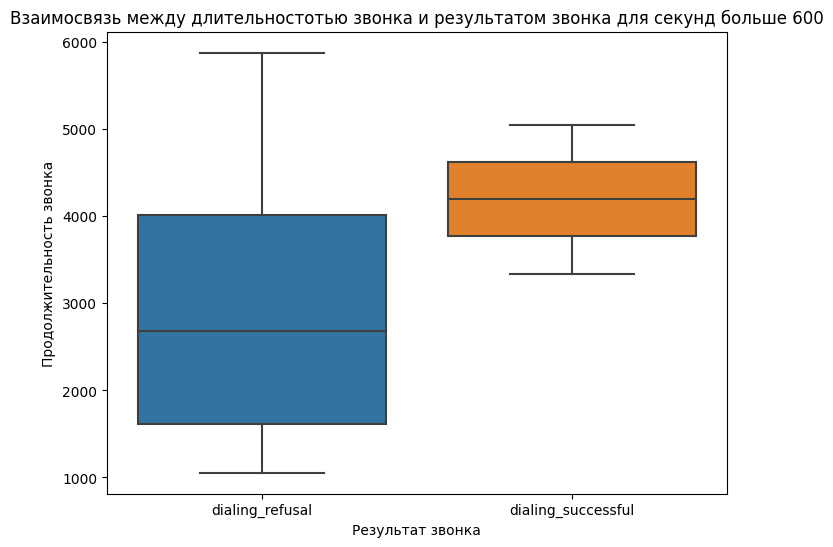

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='duratoin_result', y='duratoin_sec', data=df)
plt.title('Взаимосвязь между длительностотью звонка и результатом звонка для секунд больше 600')
plt.xlabel('Результат звонка')
plt.ylabel('Продолжительность звонка')
plt.show()

Можно заметить что продажная конверсия не сильно отличается от средней и не стоит тратить на звонок более трёх минут

In [ ]:
df

,hit_status_result_id,horoscope,duratoin_sec,duratoin_result
62,1,Дева,5117.45,dialing_refusal
115,1,Дева,4040.80,dialing_refusal
146,3,Дева,5042.92,dialing_successful
7169,1,Дева,1521.16,dialing_refusal
8553,1,Дева,3934.25,dialing_refusal
9506,1,Дева,1875.39,dialing_refusal
9864,1,Дева,3492.17,dialing_refusal
14346,1,Дева,5538.99,dialing_refusal
14417,1,Дева,1084.70,dialing_refusal
14449,3,Дева,3338.00,dialing_successful


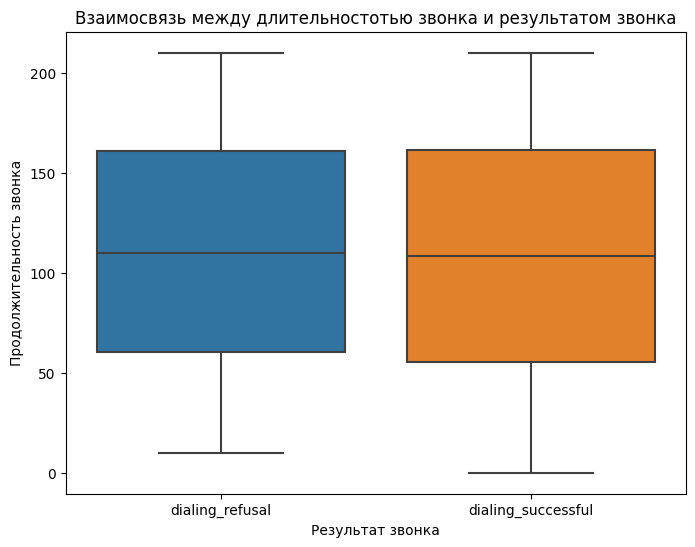

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='duratoin_result', y='duratoin_sec', data=df)
plt.title('Взаимосвязь между длительностотью звонка и результатом звонка')
plt.xlabel('Результат звонка')
plt.ylabel('Продолжительность звонка')
plt.show()

Видим подтверждение гипотезы что продолжительность звонка никак не влияет на продажную конверсию.

## Подсчет количества операторов каждого знака зодиака, и подсчет продажной конверсии для каждого знака зодиака.

In [ ]:
%%sql
CREATE TABLE Count_Conversion AS
SELECT hit_status_result_id, horoscope.horoscope, call.duratoin_sec
FROM action
LEFT JOIN call ON action.hit_rk = call.wo_hit_rk
LEFT JOIN horoscope ON horoscope.agent_login = call.agent_login
WHERE hit_status_result_id = 3 or hit_status_result_id = 1

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
SELECT
    cc.horoscope,
    ROUND(SUM(CASE WHEN cc.hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN cc.hit_status_result_id = 1 OR cc.hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS zodiac_sign_ratio,
    ROUND(AVG(cc.duratoin_sec),4) AS duratoin_sec_avg,
    COUNT(cc.hit_status_result_id) AS Count_dialing,
    ch."COUNT(horoscope.horoscope)" AS count_horoscope_agent
FROM
    Count_Conversion cc
LEFT JOIN
    count_horoscrope ch ON cc.horoscope = ch.horoscope
GROUP BY
    cc.horoscope, ch."COUNT(horoscope.horoscope)"
ORDER BY
    zodiac_sign_ratio DESC;

 * sqlite:////content/data.db
Done.


horoscope,zodiac_sign_ratio,duratoin_sec_avg,Count_dialing,count_horoscope_agent
Стрелец,0.2109,108.2043,1067,316
Скорпион,0.1996,113.0106,471,70
Близнецы,0.1877,106.3388,1721,120
Овен,0.1655,109.1132,1166,88
Дева,0.1569,114.7043,8883,785
Водолей,0.1479,111.9069,1332,93
Весы,0.1369,110.2561,1636,125
Лев,0.1337,113.3009,329,28
Козерог,0.132,112.4871,659,46
Рак,0.129,108.6814,1814,125


Можно наблюдать, что по какой-то причине "стрельцы" имеют наивысшую продажную конверсию, а "тельцы" наименьшую. При этом это нельзя списать на малое количество этих знаков зодиака. Также видно, что у нас "девы" составляют примерно больше трети всех знаков зодиака. Можно предположить, что HR охотнее отбирают кандидатов "дев" при отборе. Или же люди с этим знаком зодиака охотнее идут в продажи, несмотря на их в целом среднюю способность к продажам. Впрочем, одно другого не исключает.

In [ ]:
result = %sql SELECT cc.horoscope, ROUND(SUM(CASE WHEN cc.hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 / NULLIF(SUM(CASE WHEN cc.hit_status_result_id = 1 OR cc.hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS zodiac_sign_ratio, ROUND(AVG(cc.duratoin_sec),4) AS duratoin_sec_avg, COUNT(cc.hit_status_result_id) AS Count_dialing, ch."COUNT(horoscope.horoscope)" AS count_horoscope_agent FROM Count_Conversion cc LEFT JOIN count_horoscrope ch ON cc.horoscope = ch.horoscope GROUP BY cc.horoscope, ch."COUNT(horoscope.horoscope)" ORDER BY zodiac_sign_ratio DESC;

 * sqlite:////content/data.db
Done.


In [ ]:
df_horoscope = result.DataFrame()

In [ ]:
%%sql
CREATE TEMPORARY TABLE count_horoscrope AS
SELECT COUNT(horoscope.horoscope), horoscope
FROM horoscope
GROUP BY horoscope
ORDER BY COUNT(horoscope.horoscope) DESC;

 * sqlite:////content/data.db
(sqlite3.OperationalError) table count_horoscrope already exists
[SQL: CREATE TEMPORARY TABLE count_horoscrope AS
SELECT COUNT(horoscope.horoscope), horoscope
FROM horoscope
GROUP BY horoscope
ORDER BY COUNT(horoscope.horoscope) DESC;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## Подсчет продажной конверсии для каждого управления, группы.

In [ ]:
%%sql DROP TABLE Count_Conversion_For_management;

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
CREATE TABLE Count_Conversion_For_management AS
SELECT
    t1.source_system_cd,
    t2.agent_login, t2.finish_dttm as finish_dttm_end_talk,
    t3.hit_status_result_id,
    t6.hit_status_result_desc,
    t8.group_nm,
    t9.management_nm
FROM task t1
LEFT JOIN call t2 ON t1.task_rk = t2.wo_task_rk
LEFT JOIN action t3 ON t2.wo_hit_rk = t3.hit_rk
LEFT JOIN product t4 ON t3.hit_rk = t4.hit_rk
LEFT JOIN emp_x_org_gr t5 ON t2.wo_employee_rk = t5.employee_rk
LEFT JOIN result t6 ON t3.hit_status_result_id = t6.hit_status_result_id
LEFT JOIN "group" t8 ON t5.org_group_rk = t8.org_group_rk

LEFT JOIN mngmnt t9 ON t8.org_management_rk = t9.org_management_rk

 * sqlite:////content/data.db
(sqlite3.OperationalError) table Count_Conversion_For_management already exists
[SQL: CREATE TABLE Count_Conversion_For_management AS
SELECT
    t1.source_system_cd,
    t2.agent_login, t2.finish_dttm as finish_dttm_end_talk,
    t3.hit_status_result_id,
    t6.hit_status_result_desc,
    t8.group_nm,
    t9.management_nm
FROM task t1
LEFT JOIN call t2 ON t1.task_rk = t2.wo_task_rk
LEFT JOIN action t3 ON t2.wo_hit_rk = t3.hit_rk
LEFT JOIN product t4 ON t3.hit_rk = t4.hit_rk
LEFT JOIN emp_x_org_gr t5 ON t2.wo_employee_rk = t5.employee_rk
LEFT JOIN result t6 ON t3.hit_status_result_id = t6.hit_status_result_id
LEFT JOIN "group" t8 ON t5.org_group_rk = t8.org_group_rk

LEFT JOIN mngmnt t9 ON t8.org_management_rk = t9.org_management_rk]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
%%sql
SELECT
    agent_login,
    group_nm,
    management_nm,
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS agent_ratio
FROM
    Count_Conversion_For_management
GROUP BY
    agent_login
HAVING
    Count_dialing_for_agent > 15 -- Минимальное количество звонков для отбора чтобы избежать дело случая
ORDER BY
    agent_ratio DESC;

 * sqlite:////content/data.db
Done.


agent_login,group_nm,management_nm,Count_dialing_for_agent,agent_ratio
yrovibna,Группа 17,Управление КЦ Керс,25,1.0
novamere,Группа 45,Управление КЦ Мазан,43,1.0
ninayuvd,Группа 2,Управление КЦ Хирс,25,1.0
movagsya,Группа 17,Управление КЦ Керс,36,1.0
lovazmba,Группа 17,Управление КЦ Керс,21,1.0
hhakevve,Группа 2,Управление КЦ Хирс,38,1.0
dinayuas,Группа 2,Управление КЦ Хирс,38,1.0
cyanrser,Группа 36,Управление КЦ Чизан,70,1.0
alkamgpa,Группа 2,Управление КЦ Хирс,25,1.0
stinmist,Группа 2,Управление КЦ Хирс,43,0.9286


In [ ]:
result = %sql SELECT agent_login, group_nm, management_nm, COUNT(hit_status_result_id) AS Count_dialing_for_agent, ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 / NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS agent_ratio FROM Count_Conversion_For_management GROUP BY agent_login HAVING Count_dialing_for_agent ORDER BY agent_ratio DESC;

 * sqlite:////content/data.db
Done.


In [ ]:
df_agent_ratio = result.DataFrame()

Можно видеть что главенствующие позиции по продажной конверсии в основном занимают операторы из Керса и Хирса.  

In [ ]:
%%sql
CREATE TABLE temper AS
SELECT
    agent_login,
    group_nm,
    management_nm,
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS agent_ratio
FROM
    Count_Conversion_For_management
GROUP BY
    agent_login
HAVING
    Count_dialing_for_agent > 15
ORDER BY
    agent_ratio DESC;

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
SELECT agent_login, group_nm, management_nm, Count_dialing_for_agent, ROUND(MAX(agent_ratio),4) as agent_ratio
from temper
GROUP BY (management_nm)
ORDER BY MAX(agent_ratio) DESC

 * sqlite:////content/data.db
Done.


agent_login,group_nm,management_nm,Count_dialing_for_agent,agent_ratio
cyanrser,Группа 36,Управление КЦ Чизан,70,1.0
ninayuvd,Группа 2,Управление КЦ Хирс,25,1.0
novamere,Группа 45,Управление КЦ Мазан,43,1.0
yrovibna,Группа 17,Управление КЦ Керс,25,1.0
kovabzbe,Группа 15,Управление КЦ Шоколад,35,0.8333
novaarku,Группа 13,Управление КЦ Дирис,46,0.7692
syanvema,Группа 37,Управление КЦ Страница,17,0.75
aevaatta,Группа 41,Управление КЦ Парис,26,0.75
xinaaoma,Группа 6,Управление КЦ Ребус,33,0.7273
9569aosm,Группа 5,Управление КЦ Ромашка,47,0.6


In [ ]:
result = %sql SELECT agent_login, group_nm, management_nm, Count_dialing_for_agent, ROUND(MAX(agent_ratio),4) as agent_ratio from temper GROUP BY (management_nm) ORDER BY MAX(agent_ratio) DESC

 * sqlite:////content/data.db
Done.


In [ ]:
df_agent_ratio_by_management = result.DataFrame()

Отбор операторов с наивысшей продажной конверсией по управлениям

In [ ]:
result = %sql SELECT * FROM Count_Conversion_For_management;

 * sqlite:////content/data.db
Done.


In [ ]:
df = result.DataFrame()

In [ ]:
filtered_df = df[(df['hit_status_result_id'] == 1) | (df['hit_status_result_id'] == 3)]

In [ ]:
filtered_df = filtered_df.drop('hit_status_result_desc', axis = 1)

In [ ]:
import pandas as pd


filter_1 = df['hit_status_result_id'] == 1
filter_3 = df['hit_status_result_id'] == 3


group_counts = df.groupby(['management_nm', 'group_nm']).agg(
    Refuse=pd.NamedAgg(column='hit_status_result_id', aggfunc=lambda x: (x == 1).sum()),
    success=pd.NamedAgg(column='hit_status_result_id', aggfunc=lambda x: (x == 3).sum())
)

group_counts['Sales_conversion'] = group_counts['success'] / (group_counts['Refuse'] + group_counts['success'])


In [ ]:
df_cleaned = group_counts.dropna()

In [ ]:
df_management_group_by_group_nm = df_cleaned

In [ ]:
df_management_group_by_group_nm

Refuse  success  Sales_conversion
management_nm          group_nm                                    
Управление КЦ Варис    Группа 12      20        4          0.166667
Управление КЦ Верс     Группа 18     209       17          0.075221
                       Группа 19    1186      124          0.094656
Управление КЦ Вилис    Группа 7      432       63          0.127273
Управление КЦ Вышка    Группа 35      89        2          0.021978
Управление КЦ Дарис    Группа 27      88       10          0.102041
Управление КЦ Дерс     Группа 10      47        6          0.113208
Управление КЦ Дилис    Группа 32       9       13          0.590909
Управление КЦ Дирим    Группа 29    1145      115          0.091270
Управление КЦ Дирис    Группа 13     427      153          0.263793
Управление КЦ Зирс     Группа 14     167       11          0.061798
Управление КЦ Казан    Группа 31     314       50          0.137363
Управление КЦ Карис    Группа 40      22        0          0.000000
Управление КЦ Кас      Группа 28     126       13          0.093525
                       Группа 52     692       67          0.088274
Управление КЦ Керс     Группа 17     116      257          0.689008
                       Группа 38     183       40          0.179372
Управление КЦ Кирим    Группа 21     615       66          0.096916
Управление КЦ Кирис    Группа 3      463       52          0.100971
Управление КЦ Лес      Группа 8      120        7          0.055118
Управление КЦ Мазан    Группа 45     759      122          0.138479
Управление КЦ Мас      Группа 20     236       19          0.074510
Управление КЦ Мерс     Группа 43     457       44          0.087824
Управление КЦ Мес      Группа 22      33        3          0.083333
Управление КЦ Мирс     Группа 33     204       18          0.081081
Управление КЦ Неп      Группа 48     531       45          0.078125
Управление КЦ Нерс     Группа 49      74        8          0.097561
Управление КЦ Парис    Группа 41     931      165          0.150547
Управление КЦ Пирис    Группа 11      99        7          0.066038
Управление КЦ Пирс     Группа 1      298       55          0.155807
Управление КЦ Помидор  Группа 24     144        9          0.058824
Управление КЦ Ребус    Группа 46     101       10          0.090090
                       Группа 6      130      130          0.500000
Управление КЦ Ромашка  Группа 5      937      132          0.123480
Управление КЦ Сас      Группа 25     141       16          0.101911
Управление КЦ Сезам    Группа 16     328       29          0.081232
Управление КЦ Сеньор   Группа 50     167       18          0.097297
Управление КЦ Страница Группа 23     902       67          0.069143
                       Группа 37     124       78          0.386139
Управление КЦ Супер    Группа 42      75        6          0.074074
Управление КЦ Тазан    Группа 26     539       45          0.077055
Управление КЦ Тирс     Группа 51     102        6          0.055556
Управление КЦ Хирс     Группа 2      106      195          0.647841
Управление КЦ Черс     Группа 47      51        7          0.120690
Управление КЦ Чизан    Группа 30     935      208          0.181977
                       Группа 34       6        0          0.000000
                       Группа 36    3252      662          0.169136
Управление КЦ Чирим    Группа 44      10        2          0.166667
Управление КЦ Чирис    Группа 9       31        7          0.184211
Управление КЦ Шоколад  Группа 15     286      127          0.307506

Отбор управлений и соответствующих групп с продажной конверсией по группам

In [ ]:
%%sql
SELECT
    group_nm,
    management_nm,
    COUNT(hit_status_result_id) AS Count_dialing_for_group,
    ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS group_nm_ratio
FROM
    Count_Conversion_For_management
GROUP BY
    group_nm
HAVING Count_dialing_for_group > 100
ORDER BY group_nm_ratio DESC;

 * sqlite:////content/data.db
Done.


group_nm,management_nm,Count_dialing_for_group,group_nm_ratio
Группа 17,Управление КЦ Керс,1434,0.689
Группа 2,Управление КЦ Хирс,1274,0.6478
Группа 6,Управление КЦ Ребус,549,0.5
Группа 37,Управление КЦ Страница,672,0.3861
Группа 15,Управление КЦ Шоколад,1831,0.3075
Группа 13,Управление КЦ Дирис,2208,0.2638
Группа 9,Управление КЦ Чирис,142,0.1842
Группа 30,Управление КЦ Чизан,4633,0.182
Группа 38,Управление КЦ Керс,927,0.1794
Группа 36,Управление КЦ Чизан,16705,0.1691


In [ ]:
result = %sql SELECT group_nm, management_nm, COUNT(hit_status_result_id) AS Count_dialing_for_group, ROUND(SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 / NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0),4) AS group_nm_ratio FROM Count_Conversion_For_management GROUP BY group_nm HAVING Count_dialing_for_group > 100 ORDER BY group_nm_ratio DESC;

 * sqlite:////content/data.db
Done.


In [ ]:
df_group = result.DataFrame()

Группы с наивысшей продажной конверсией в каждом управлении.



In [ ]:
%%sql
SELECT
    management_nm,
    COUNT(hit_status_result_id) AS Count_dialing_for_management,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS management_nm_ratio
FROM
    Count_Conversion_For_management
GROUP BY
    management_nm
ORDER BY management_nm_ratio DESC;

 * sqlite:////content/data.db
Done.


management_nm,Count_dialing_for_management,management_nm_ratio
Управление КЦ Хирс,1274,0.6478405315614618
Управление КЦ Дилис,58,0.5909090909090909
Управление КЦ Керс,2361,0.4983221476510067
Управление КЦ Ребус,802,0.37735849056603776
Управление КЦ Шоколад,1831,0.3075060532687651
Управление КЦ Дирис,2208,0.2637931034482759
Управление КЦ Чирис,142,0.18421052631578946
Управление КЦ Чизан,21381,0.17183488050562906
Управление КЦ Чирим,47,0.16666666666666666
Управление КЦ Варис,69,0.16666666666666666


Управления с наивысшей продажной конверсией. Можно видеть, что наиболее высокие показатели показыват Керс и Хирс. Дилис в расчёт не берем из-за малого количества звонков. Хуже всего себя показали Неп и Тазан. При таком количестве звонков показатели продажной конверсии у них не высоки. Остальные управления с низкими показателями продажной конверсии имеют не очень большое количество звонков и возможно в будущем они проявят себя лучше. Интересная деталь заключается в том,  что увеличение количества звонков заставляет стремиться продажную конверсию к ≈ 0,15. Это хорошо видно для случая с девами, а также это видно для случая управления Чизан.

In [ ]:
result = %sql SELECT management_nm, COUNT(hit_status_result_id) AS Count_dialing_for_management, SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 / NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS management_nm_ratio FROM Count_Conversion_For_management GROUP BY management_nm ORDER BY management_nm_ratio DESC;

 * sqlite:////content/data.db
Done.


In [ ]:
df_management = result.DataFrame()

In [ ]:
%%sql
SELECT *
FROM
    Count_Conversion_For_management
WHERE management_nm = "Управление КЦ Вирс"

 * sqlite:////content/data.db
Done.


source_system_cd,agent_login,finish_dttm_end_talk,hit_status_result_id,hit_status_result_desc,group_nm,management_nm
GI,ajloagxo,2022-08-12 10:53:48,5,Недозвон,Группа 4,Управление КЦ Вирс
FW,5275masi,2022-08-16 16:38:24,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,ajloagxo,2022-08-15 14:22:50,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,9694eaav,2022-08-01 14:43:10,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,nayaispo,2022-08-02 12:21:20,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,nayaispo,2022-08-31 17:01:28,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,chukkima,2022-08-25 11:43:04,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,chukkima,2022-08-17 17:03:36,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,sovalmbo,2022-08-04 10:30:44,5,Недозвон,Группа 4,Управление КЦ Вирс
GI,sovalmbo,2022-08-05 12:01:52,5,Недозвон,Группа 4,Управление КЦ Вирс


Проверяю почему для управления Вирс нет значений. По какой-то причине результат звонка у них всегда "Недозвон". Маловероятно, что эта аномалия связана со случайностью, вероятно какой-то сбой в системе.

In [ ]:
result = %sql SELECT * FROM Count_Conversion_For_management WHERE management_nm = "Управление КЦ Вирс";
df_virs = result.DataFrame()
df_

 * sqlite:////content/data.db
Done.


In [ ]:
%%sql
SELECT *
FROM
    Count_Conversion_For_management
WHERE management_nm = "Управление КЦ Вазан"

 * sqlite:////content/data.db
Done.


agent_login,hit_status_result_id,hit_status_result_desc,group_nm,management_nm
tyanazha,5,Недозвон,Группа 39,Управление КЦ Вазан
tyanazha,5,Недозвон,Группа 39,Управление КЦ Вазан
tyanazha,6,"Дозвон, Отложить",Группа 39,Управление КЦ Вазан


Проверяю почему для управления Вазан нет значений. Здесь всё прозаично, если Управление КЦ Вазан только открылся, то причина ясна. Или же данные об их звонках не были загружены в БД.

In [ ]:
result = %sql SELECT * FROM Count_Conversion_For_management WHERE management_nm = "Управление КЦ Вазан";
df_kazan = result.DataFrame()

 * sqlite:////content/data.db
Done.


## Поиск трендов. Зависимость продажной конверсии от дня недели и времени суток. Зависимость "утилизации" клиента от дня недели.


In [ ]:
%%sql
CREATE TABLE T AS
SELECT
    r.hit_status_result_id,
    c.finish_dttm as finish_dttm_end_talk
FROM
    call c
LEFT JOIN
    action r ON c.wo_hit_rk = r.hit_rk
WHERE
    r.hit_status_result_id IN (1,3);

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql
CREATE TABLE Sales_Conversion_Per_Hour AS
SELECT
    strftime('%H', finish_dttm_end_talk) AS hour_of_day,
    CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversion,
    COUNT(hit_status_result_id) as Count_Dialings
FROM T
WHERE hit_status_result_id IN (1, 3)
GROUP BY hour_of_day

 * sqlite:////content/data.db
Done.


[]

In [ ]:
%%sql SELECT hour_of_day, ROUND(Sales_Conversion,3) AS Sales_Conversion, Count_Dialings FROM Sales_Conversion_Per_Hour

 * sqlite:////content/data.db
Done.


hour_of_day,Sales_Conversion,Count_Dialings
03,0.0,1
04,0.219,32
05,0.282,85
06,0.113,194
07,0.18,334
08,0.121,1367
09,0.138,1548
10,0.134,2534
11,0.155,2659
12,0.146,2407


Видно что в ночное время звонков значительно меньше чем в дневное, но выше продажная конверсия.

In [ ]:
result_for_hour = %sql SELECT strftime('%H', finish_dttm_end_talk) AS hour_of_day, CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversion, COUNT(hit_status_result_id) as Count_Dialings FROM T WHERE hit_status_result_id IN (1, 3) GROUP BY hour_of_day

 * sqlite:////content/data.db
Done.


In [ ]:
df_result_for_hour  = result_for_hour.DataFrame()

In [ ]:
df.dtypes

hour_of_day           int64
Sales_Conversion    float64
Count_Dialings        int64
dtype: object

In [ ]:
df = df.drop([0, len(df)-1])

In [ ]:
df['hour_of_day'] = df['hour_of_day'].astype(int)

range(0, 19)

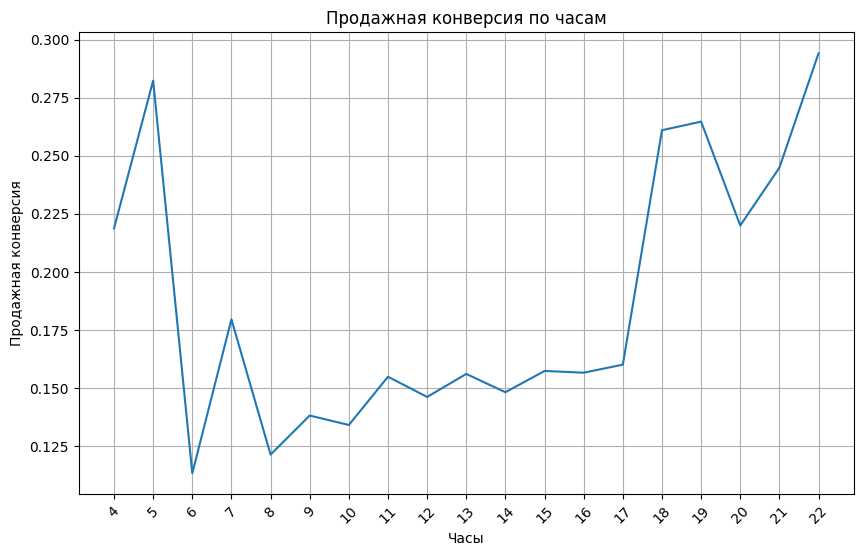

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10, 6))
plt.xticks(range(4, 23), df['hour_of_day'], rotation=45)
plt.plot(df['hour_of_day'], df['Sales_Conversion'])
plt.grid(True)

plt.xlabel('Часы')
plt.ylabel('Продажная конверсия')
plt.title('Продажная конверсия по часам')


plt.show()

Видно что продажная конверсия выше от 6 вечера до 5 утра. Необходимо исследовать почему так происходит.

In [ ]:
%%sql SELECT agent_login,	finish_dttm_end_talk,	hit_status_result_id
FROM Count_Conversion_For_management
WHERE hit_status_result_id IN (1, 3, 5)

 * sqlite:////content/data.db
Done.


agent_login,finish_dttm_end_talk,hit_status_result_id
movakaro,2022-08-25 16:13:02,5
8306aava,2022-08-02 13:34:55,1
8251nsma,2022-08-08 22:07:29,1
9185avis,2022-08-04 13:59:51,3
tevapasa,2022-08-15 11:12:08,1
pyanekov,2022-08-04 06:23:21,1
syanlfsa,2022-08-19 17:10:14,5
ndinavpo,2022-08-22 12:16:31,5
dovamado,2022-08-23 11:24:32,5
5834mvsh,2022-08-05 11:57:07,1


Ставлю гипотезу, что люди в ночное и утреннее время охотнее берут трубку. Также проверю эту гипотезу для выходных.

In [ ]:
%%sql
SELECT
    ROUND((COUNT(CASE WHEN hit_status_result_id = 5 THEN 1 END) * 100.0) /
    COUNT(hit_status_result_id),2) AS Percentage
FROM Count_Conversion_For_management
WHERE strftime('%w', finish_dttm_end_talk) IN ('0', '6');

 * sqlite:////content/data.db
Done.


Percentage
53.71


In [ ]:
%%sql
SELECT
    ROUND((COUNT(CASE WHEN hit_status_result_id = 5 THEN 1 END) * 100.0) /
    COUNT(hit_status_result_id),2) AS Percentage
FROM Count_Conversion_For_management
WHERE strftime('%w', finish_dttm_end_talk) NOT IN ('0', '6');

 * sqlite:////content/data.db
Done.


Percentage
56.69


In [ ]:
%%sql
SELECT
    ROUND((COUNT(CASE WHEN hit_status_result_id = 5 THEN 1 END) * 100.0) /
    COUNT(hit_status_result_id),2) AS Percentage
FROM Count_Conversion_For_management
WHERE strftime('%H', finish_dttm_end_talk) BETWEEN '06' AND '17' ;

 * sqlite:////content/data.db
Done.


Percentage
56.63


In [ ]:
%%sql
SELECT
    ROUND((COUNT(CASE WHEN hit_status_result_id = 5 THEN 1 END) * 100.0) /
    COUNT(hit_status_result_id),2) AS Percentage
FROM Count_Conversion_For_management
WHERE strftime('%H', finish_dttm_end_talk) NOT BETWEEN '06' AND '17' ;

 * sqlite:////content/data.db
Done.


Percentage
55.29


Видно что результат взятия трубки не зависит от времени суток.

Возможно операторы работающие в это время имеют наиболее высокую продажную конверсию в целом, чем только те кто работает по будням и в дневное время. Возможно, что это связано с тем что операторы работающие в это время наиболее мотивированы и имеют хороший навык продажи.  

In [ ]:
%%sql
SELECT
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS Sales_Conversion
FROM
    Count_Conversion_For_management
WHERE agent_login IN
(
  SELECT DISTINCT agent_login
  FROM Count_Conversion_For_management
  WHERE strftime('%w', finish_dttm_end_talk) IN ('0', '6')
);

 * sqlite:////content/data.db
Done.


Count_dialing_for_agent,Sales_Conversion
36960,0.18700034758428918


In [ ]:
%%sql
SELECT
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS Sales_Conversion
FROM
    Count_Conversion_For_management
WHERE agent_login NOT IN
(
  SELECT DISTINCT agent_login
  FROM Count_Conversion_For_management
  WHERE strftime('%w', finish_dttm_end_talk) IN ('0', '6')
);

 * sqlite:////content/data.db
Done.


Count_dialing_for_agent,Sales_Conversion
52214,0.12909118587304003


Видно что операторы которые работают не только в будни имеют наиболее высокую продажную конверсию.

In [ ]:
%%sql
SELECT
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS Sales_Conversion
FROM
    Count_Conversion_For_management
WHERE agent_login IN
(
  SELECT DISTINCT agent_login
WHERE agent_login NOT IN (
    SELECT DISTINCT agent_login
    FROM Count_Conversion_For_management
    WHERE strftime('%H', finish_dttm_end_talk) BETWEEN '17' AND '23'
       OR strftime('%H', finish_dttm_end_talk) BETWEEN '00' AND '05'
)
);

 * sqlite:////content/data.db
Done.


Count_dialing_for_agent,Sales_Conversion
23235,0.12198739340007415


In [ ]:
%%sql
SELECT
    COUNT(hit_status_result_id) AS Count_dialing_for_agent,
    SUM(CASE WHEN hit_status_result_id = 3 THEN 1 ELSE 0 END) * 1.0 /
    NULLIF(SUM(CASE WHEN hit_status_result_id = 1 OR hit_status_result_id = 3 THEN 1 ELSE 0 END), 0) AS Sales_Conversion
FROM
    Count_Conversion_For_management
WHERE agent_login IN
(
  SELECT DISTINCT agent_login
  FROM Count_Conversion_For_management
  WHERE strftime('%H', finish_dttm_end_talk) NOT BETWEEN '06' AND '17'
);

 * sqlite:////content/data.db
Done.


Count_dialing_for_agent,Sales_Conversion
34669,0.18125373134328357


Для времени суток можно сделать такой же вывод.

Вероятней всего продажная конверсия в ночное время суток выше из-за того что ночью звонят наиболее опытные и мотивированные операторы, а также клиенты в это время суток наиболее склонны к покупкам ввиду их усталости. Также, более высокую продажную конверсию в ночное время можно списать на небольшой объем выборки.

In [ ]:
%sql SELECT DATE(finish_dttm_end_talk) AS day,ROUND(CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)),4) as Sales_Conversions, COUNT(hit_status_result_id) as Count_Dialings FROM T WHERE hit_status_result_id IN (1, 3) GROUP BY DATE(finish_dttm_end_talk);

 * sqlite:////content/data.db
(sqlite3.OperationalError) no such table: T
[SQL: SELECT DATE(finish_dttm_end_talk) AS day,ROUND(CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)),4) as Sales_Conversions, COUNT(hit_status_result_id) as Count_Dialings FROM T WHERE hit_status_result_id IN (1, 3) GROUP BY DATE(finish_dttm_end_talk);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
result = %sql SELECT DATE(finish_dttm_end_talk) AS day,CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversions, COUNT(hit_status_result_id) AS Count_Dialings FROM T WHERE hit_status_result_id IN (1, 3) GROUP BY DATE(finish_dttm_end_talk);

 * sqlite:////content/data.db
Done.


In [ ]:
df_days_sales_conversion = result.DataFrame()

In [ ]:
df.dtypes

day                  datetime64[ns]
Sales_Conversions           float64
dtype: object

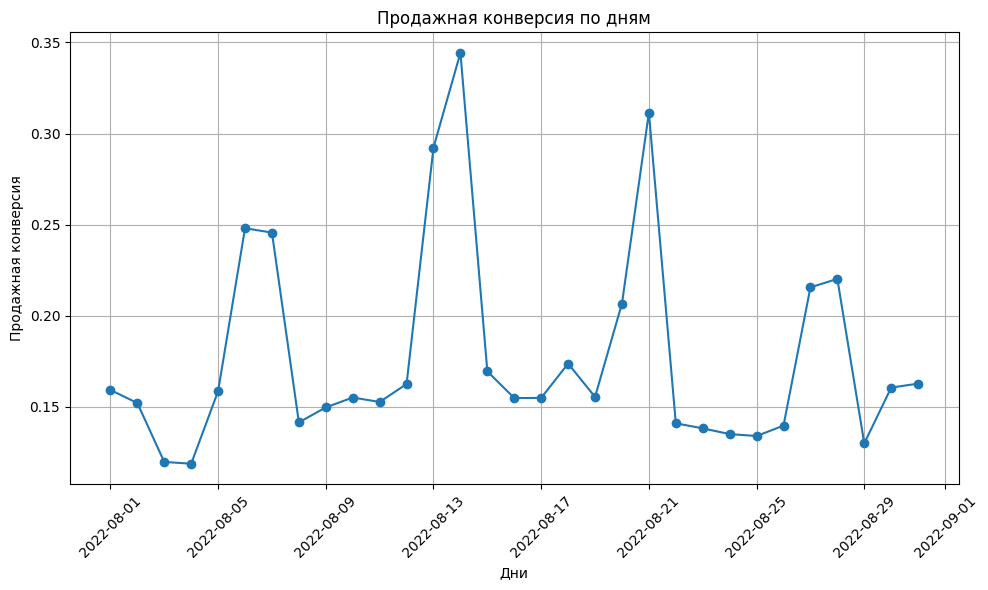

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['day'] = pd.to_datetime(df['day'])

# Постройте график
plt.figure(figsize=(10, 6))
plt.plot_date(df['day'], df['Sales_Conversions'], '-o')
plt.title('Продажная конверсия по дням')
plt.xlabel('Дни')
plt.ylabel('Продажная конверсия')
plt.grid(True)
plt.xticks(rotation=45)  # Поворот меток оси x для лучшей читаемости
plt.tight_layout()
plt.show()

In [ ]:
%%sql
SELECT
    DATE(finish_dttm_end_talk) AS day,
    ROUND(CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)), 3) as Sales_Conversions,
    COUNT(hit_status_result_id) AS Count_Dialings
FROM T
WHERE hit_status_result_id IN (1, 3)

GROUP BY DATE(finish_dttm_end_talk);

 * sqlite:////content/data.db
Done.


day,Sales_Conversions,Count_Dialings
2022-08-01,0.159,942
2022-08-02,0.152,947
2022-08-03,0.12,1044
2022-08-04,0.119,960
2022-08-05,0.159,864
2022-08-06,0.248,125
2022-08-07,0.246,57
2022-08-08,0.141,997
2022-08-09,0.15,1029
2022-08-10,0.155,935


Видно, что в субботу и воскрсенье наиболее высокая продажная конверсия. Это может быть связано с тем, как было сказано ранее, в это время звонят наиболее опытные и мотивированные операторы. А также можно предположить, что люди в выходные дни наиболее склонны к покупкам. Ну или же это может быть, как и в случае с ночным временем суток, влияние малого количества звонков по сравнению с будними днями.

In [ ]:
%%sql
SELECT
    STRFTIME('%Y-%W', finish_dttm_end_talk) AS year_week,
    CAST(COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) AS FLOAT) / (COUNT(CASE WHEN hit_status_result_id = 3 THEN 1 END) + COUNT(CASE WHEN hit_status_result_id = 1 THEN 1 END)) as Sales_Conversions
FROM T
WHERE hit_status_result_id IN (1, 3)
GROUP BY year_week;


 * sqlite:////content/data.db
Done.


year_week,Sales_Conversions
2022-31,0.1447661469933185
2022-32,0.15798354777473106
2022-33,0.16487300904003444
2022-34,0.1421341206242092
2022-35,0.15031469825990373


В случае с неделями в месяце особой разницы нет.

In [ ]:
result = %sql SELECT call.finish_dttm as finish_dttm_end_talk, action.hit_status_result_id, product.hid FROM call LEFT JOIN action ON call.wo_hit_rk = action.hit_rk LEFT JOIN product ON call.wo_hit_rk = product.hit_rk WHERE action.hit_status_result_id = 1 OR action.hit_status_result_id = 3 ORDER BY finish_dttm_end_talk

 * sqlite:////content/data.db
Done.


Посмотрим среднее время ожидания очереди для каждой очереди.

In [ ]:
%%sql
SELECT q.queue_id, q.queue_desc,
       ROUND(AVG(
           STRFTIME('%s', DATETIME(c.finish_dttm)) - STRFTIME('%s', DATETIME(t.create_dttm))
       ),1) AS avg_wait_time_second,
      COUNT(DISTINCT c.wo_task_rk) AS task_count
FROM queue q
LEFT JOIN call c ON q.queue_id = c.wo_queue_id
LEFT JOIN task t ON c.wo_task_rk = t.task_rk
GROUP BY q.queue_id, q.queue_desc
HAVING COUNT(DISTINCT c.wo_task_rk) > 30  -- Выбираем только строки, в которых queue_desc встречается более 30 раз
ORDER BY avg_wait_time_second DESC;

 * sqlite:////content/data.db
Done.


queue_id,queue_desc,avg_wait_time_second,task_count
13137,Очередь 2,2800755.2,89
9450,Очередь 107,2604529.5,71
4874,Очередь 76,1637284.4,112
12728,Очередь 63,1604874.9,398
12049,Очередь 86,1474161.1,216
2221,Очередь 33,1380272.5,342
14790,Очередь 23,1367519.2,1936
14354,Очередь 58,1239633.3,1825
15085,Очередь 75,1177661.7,681
4875,Очередь 5,1165806.4,192


Отобрал очереди которые встречаются более-менее часто. Видно, что некоторые очереди занимают продолжительные промежутки времени. Если это не связано с их спецификой, то возможна их оптимизация и выделение на них большего количества ресурсов.

In [ ]:
result = %sql SELECT q.queue_id, q.queue_desc, ROUND(AVG(STRFTIME('%s', DATETIME(c.finish_dttm)) - STRFTIME('%s', DATETIME(t.create_dttm))),1) AS avg_wait_time_second, COUNT(DISTINCT c.wo_task_rk) AS task_count FROM queue q LEFT JOIN call c ON q.queue_id = c.wo_queue_id LEFT JOIN task t ON c.wo_task_rk = t.task_rk GROUP BY q.queue_id, q.queue_desc HAVING COUNT(DISTINCT c.wo_task_rk) > 30   ORDER BY avg_wait_time_second DESC;

 * sqlite:////content/data.db
Done.


In [ ]:
df_queue = result.DataFrame()

In [ ]:
%%sql
SELECT task_stage_id, COUNT(*) AS stage_count
FROM task
GROUP BY task_stage_id
ORDER BY stage_count DESC;

 * sqlite:////content/data.db
Done.


task_stage_id,stage_count
1.0,39173
23.0,7909
None,2366
17.0,218
6.0,175
3.0,105
18.0,38
4.0,12
16.0,3
20.0,1


Наиболее популярные задачи

In [ ]:
%%sql
SELECT
  task_stage_id,
  AVG(julianday(finish_dttm) - julianday(create_dttm)) AS avg_duration_days
FROM
  task
GROUP BY
  task_stage_id;

 * sqlite:////content/data.db
Done.


task_stage_id,avg_duration_days
None,4.243054405976219
1.0,13.31990610235959
3.0,None
4.0,None
6.0,1.5094270831905305
16.0,None
17.0,None
18.0,None
20.0,None
23.0,10.967098315676914


По какой-то прочиние отсутсвует какой-то task, а также для большинства task'ов невозможно подсчитать среднее время от начала до завершения.

In [ ]:
%%sql
SELECT
  COUNT(*) AS null_count
FROM
  task
WHERE
  task_stage_id IN (4, 16, 17, 18, 20, 3)
  AND finish_dttm IS NULL;

 * sqlite:////content/data.db
Done.


null_count
377


In [ ]:
%%sql
SELECT
  task_stage_id, create_dttm, finish_dttm
FROM
  task
WHERE task_stage_id = 4 OR task_stage_id = 16 OR task_stage_id = 17 OR task_stage_id = 18 OR task_stage_id = 20 OR task_stage_id = 3

 * sqlite:////content/data.db
Done.


task_stage_id,create_dttm,finish_dttm
18.0,2022-08-25 09:05:53,None
3.0,2022-08-27 01:16:41,None
17.0,2022-08-10 16:50:47,None
3.0,2022-08-28 01:20:04,None
17.0,2022-08-01 13:55:14,None
17.0,2022-08-09 15:40:04,None
18.0,2022-08-26 09:32:07,None
3.0,2022-08-30 01:27:37,None
17.0,2022-08-31 16:40:50,None
4.0,2022-07-31 12:35:00,None


In [ ]:
result = %sql SELECT task_stage_id, create_dttm, finish_dttm FROM task WHERE task_stage_id = 4 OR task_stage_id = 16 OR task_stage_id = 17 OR task_stage_id = 18 OR task_stage_id = 20 OR task_stage_id = 3

 * sqlite:////content/data.db
Done.


In [ ]:
df_null_task = result.DataFrame()

Можно наблюдать аномалию, у задач 4, 16, 17, 18, 20, 3 отсуствует время окончания выполнения. Больше похоже на ошибку в системе.

Изучим количество различных задач по дням.

In [ ]:
result = %sql SELECT DATE(create_dttm) AS task_date, task_stage_id, COUNT(*) AS task_count FROM task WHERE task_stage_id IN ( 6, 4, 16, 17, 18, 20, 3) GROUP BY task_date, task_stage_id ORDER BY task_date, task_stage_id;

 * sqlite:////content/data.db
Done.


In [ ]:
df_task_by_days = result.DataFrame()

In [ ]:
df

,task_date,task_stage_id,task_count
0,2021-03-07,4.0,1
1,2021-04-08,4.0,1
2,2021-11-02,6.0,1
3,2021-11-24,4.0,1
4,2022-03-20,4.0,1
...,...,...,...
114,2022-08-31,3.0,2
115,2022-08-31,4.0,1
116,2022-08-31,6.0,5
117,2022-08-31,17.0,8


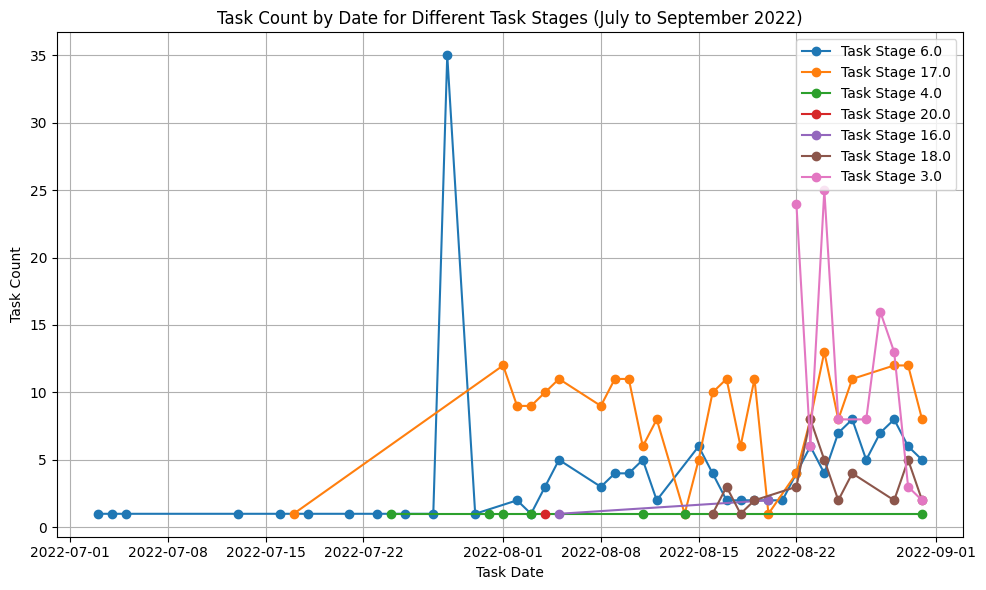

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
unique_task_stage_ids = df['task_stage_id'].unique()
df['task_date'] = pd.to_datetime(df['task_date'])


start_date = '2022-07-01'
end_date = '2022-09-30'

filtered_df = df[(df['task_date'] >= start_date) & (df['task_date'] <= end_date)]
unique_task_stage_ids = filtered_df['task_stage_id'].unique()
plt.figure(figsize=(10, 6))

for task_stage_id in unique_task_stage_ids:
    filtered_stage_df = filtered_df[filtered_df['task_stage_id'] == task_stage_id].copy()
    plt.plot(filtered_stage_df['task_date'], filtered_stage_df['task_count'], marker='o', label=f'Task Stage {task_stage_id}')


plt.title('Task Count by Date for Different Task Stages (July to September 2022)')
plt.xlabel('Task Date')
plt.ylabel('Task Count')


plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()

По какой-то причине 29 июля резко идёт скачок 6 задания. Кроме того, после этого дня резко возрастает количество всех задач. Похоже на аномалию, связанную с неполнотой данных. Также, можно заметить, что в вызодные дни количество ззадани падает.

In [ ]:
result = %sql SELECT DATE(create_dttm) AS task_date, task_stage_id, COUNT(*) AS task_count FROM task WHERE task_stage_id IN (1, 23) GROUP BY task_date, task_stage_id ORDER BY task_date, task_stage_id;

 * sqlite:////content/data.db
Done.


In [ ]:
df_task_by_days_1_23 = result.DataFrame()

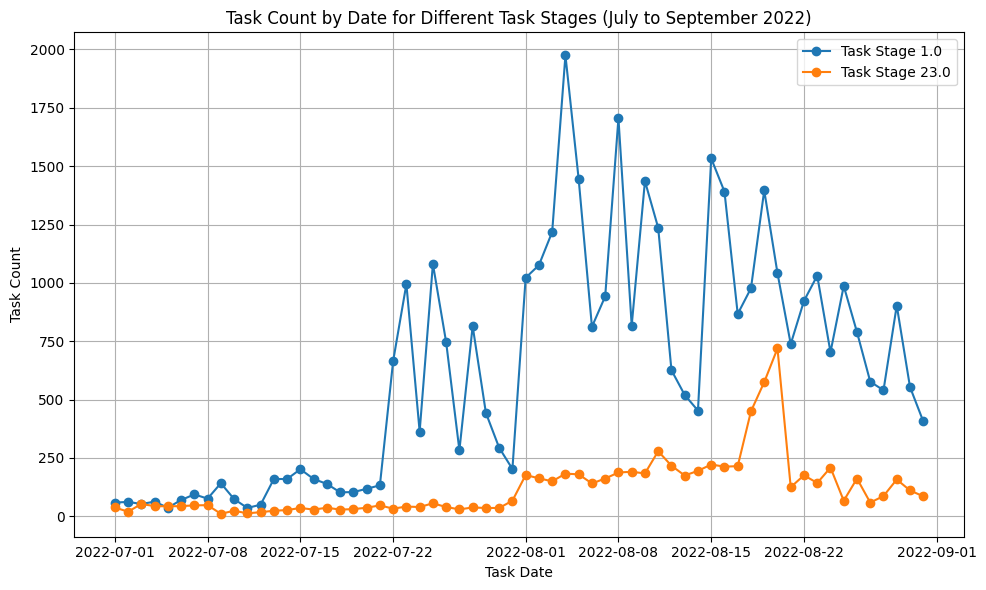

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
unique_task_stage_ids = df['task_stage_id'].unique()
df['task_date'] = pd.to_datetime(df['task_date'])


start_date = '2022-07-01'
end_date = '2022-09-30'

filtered_df = df[(df['task_date'] >= start_date) & (df['task_date'] <= end_date)]
unique_task_stage_ids = filtered_df['task_stage_id'].unique()
plt.figure(figsize=(10, 6))

for task_stage_id in unique_task_stage_ids:
    filtered_stage_df = filtered_df[filtered_df['task_stage_id'] == task_stage_id].copy()
    plt.plot(filtered_stage_df['task_date'], filtered_stage_df['task_count'], marker='o', label=f'Task Stage {task_stage_id}')


plt.title('Task Count by Date for Different Task Stages (July to September 2022)')
plt.xlabel('Task Date')
plt.ylabel('Task Count')


plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()

Здесь можно также наблюдать, что в августе резко возрастает количество заданий, а также в выходные дни падает количество заданий.

In [ ]:
%%sql
SELECT
    p.hid AS product_id,
    COUNT(p.using_flg) AS num_started_using,
    COUNT(*) AS total_products,
    ROUND((COUNT(p.using_flg) * 1.0 / COUNT(*)), 4) AS usage_ratio
FROM
    product p
GROUP BY
    p.hid

 * sqlite:////content/data.db
Done.


product_id,num_started_using,total_products,usage_ratio
1,330,6440,0.0512
2,437,17786,0.0246
3,126,3538,0.0356
4,1632,61410,0.0266


Видно, что чаще всего клиенты "утилизируются" по первому и третьему товару. А также наиболее часто продаваемые товары второй и четвёртый.

In [ ]:
%%sql
SELECT
    SUBSTR(c.finish_dttm, 1, 10) AS day,
    p.hid AS product_id,
    COUNT(*) AS usage_count
FROM
    call c
JOIN
    product p ON c.wo_hit_rk = p.hit_rk
GROUP BY
    day, p.hid
ORDER BY
    day, p.hid;


 * sqlite:////content/data.db
Done.


day,product_id,usage_count
2022-08-01,1,285
2022-08-01,2,1011
2022-08-01,3,121
2022-08-01,4,2465
2022-08-02,1,235
2022-08-02,2,656
2022-08-02,3,99
2022-08-02,4,2890
2022-08-03,1,323
2022-08-03,2,639


In [ ]:
%%sql
SELECT
    SUBSTR(c.finish_dttm, 1, 10) AS day,
    p.hid AS product_id,
    COUNT(*) AS usage_count
FROM
    call c
JOIN
    product p ON c.wo_hit_rk = p.hit_rk
WHERE
    p.using_flg = 1 or  p.using_flg = 0
GROUP BY
    day, p.hid
ORDER BY
    day, p.hid;

 * sqlite:////content/data.db
Done.


day,product_id,usage_count
2022-08-01,1,18
2022-08-01,2,15
2022-08-01,3,6
2022-08-01,4,69
2022-08-02,1,14
2022-08-02,2,14
2022-08-02,3,5
2022-08-02,4,81
2022-08-03,1,16
2022-08-03,2,14


In [ ]:
result = %sql SELECT SUBSTR(c.finish_dttm, 1, 10) AS day, p.hid AS product_id, COUNT(*) AS usage_count FROM call c JOIN product p ON c.wo_hit_rk = p.hit_rk WHERE p.using_flg = 1 or  p.using_flg = 0 GROUP BY day, p.hid ORDER BY day, p.hid;

 * sqlite:////content/data.db
Done.


In [ ]:
df_client_util_by_day = result.DataFrame()

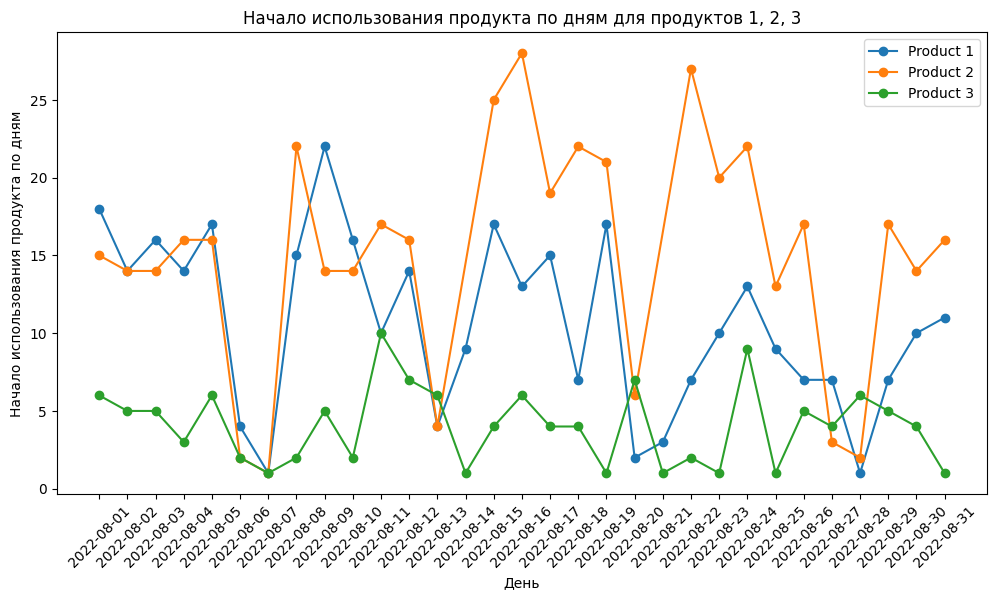

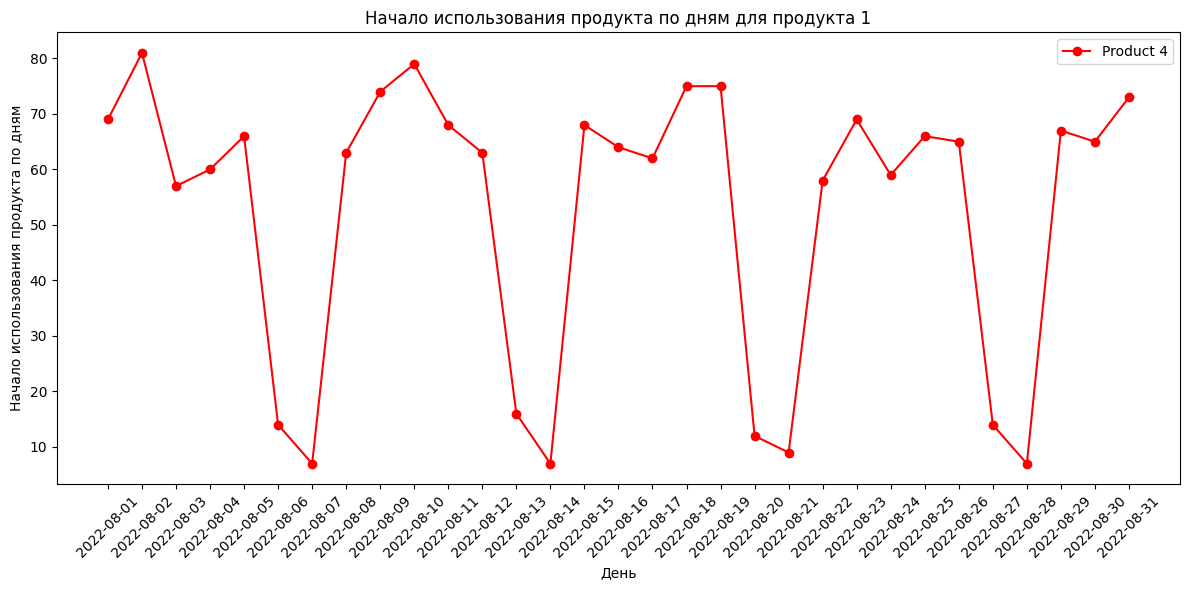

In [ ]:

product_1 = df[df['product_id'] == 1]
product_2 = df[df['product_id'] == 2]
product_3 = df[df['product_id'] == 3]
product_4 = df[df['product_id'] == 4]


plt.figure(figsize=(12, 6))
plt.plot(product_1['day'], product_1['usage_count'], label='Product 1', marker='o')
plt.plot(product_2['day'], product_2['usage_count'], label='Product 2', marker='o')
plt.plot(product_3['day'], product_3['usage_count'], label='Product 3', marker='o')

plt.xlabel('День')
plt.ylabel('Начало использования продукта по дням')
plt.title('Начало использования продукта по дням для продуктов 1, 2, 3')
plt.xticks(rotation=45)
plt.legend()


plt.figure(figsize=(12, 6))
plt.plot(product_4['day'], product_4['usage_count'], label='Product 4', marker='o', color='red')

plt.xlabel('День')
plt.ylabel('Начало использования продукта по дням')
plt.title('Начало использования продукта по дням для продукта 1')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Можно видеть, что по пятницам и субботам "утилизация" клиентов наимаеньшая. Вероятно это связано с тем, что клиенты в эти дни отдыхают, и им не до использования товаров. Впрочем, для товара 3 это не всегда верно.

In [ ]:
%%sql
SELECT
    *,
    julianday(finish_dttm) - julianday(create_dttm) AS task_duration
FROM
    task
WHERE
    abs((finish_dttm - create_dttm) - (SELECT AVG(finish_dttm - create_dttm) FROM task)) > 2 * (SELECT AVG(finish_dttm - create_dttm) FROM task);

 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm,task_duration
65299911,1.0,GI,2021-04-02 10:25:39,2022-08-05 12:08:11,490.0712037035264
88729200,1.0,GI,2021-12-02 18:35:10,2022-08-05 12:42:49,245.75531250005588
30098521,1.0,GI,2021-06-18 20:28:12,2022-09-20 12:07:07,458.65202546305954
51080931,1.0,GI,2021-09-12 05:14:42,2022-08-09 15:28:27,331.4262152775191
45976214,1.0,GI,2021-11-19 19:27:30,2022-10-12 02:00:00,326.2725694444962
28389188,1.0,GI,2021-10-13 21:17:59,2022-10-14 10:24:49,365.54641203721985
51411789,1.0,GI,2021-12-21 11:30:02,2022-08-22 18:14:45,244.28105324041098
36621897,1.0,GI,2021-09-06 13:41:01,2022-08-09 15:35:10,337.0792708331719
15887925,1.0,GI,2021-10-09 00:44:02,2022-08-05 15:23:29,300.6107291667722
78127149,1.0,GI,2021-05-28 12:43:36,2022-08-03 11:37:09,431.95385416643694


In [ ]:
result = %sql SELECT *, julianday(finish_dttm) - julianday(create_dttm) AS task_duration FROM task WHERE abs((finish_dttm - create_dttm) - (SELECT AVG(finish_dttm - create_dttm) FROM task)) > 2 * (SELECT AVG(finish_dttm - create_dttm) FROM task);

 * sqlite:////content/data.db
Done.


In [ ]:
df_time_duration_anomaly = result.DataFrame()

Отбираем задачи с длительностью большей средней в два раза. Длительность в среднем около года. Либо это аномалия, либо специфика задания позволяет его выполнять в течении длительного времени.

In [ ]:
%%sql
SELECT *
FROM task
WHERE task_stage_id IS NULL;

 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm
15924764,None,CM,2022-08-25 13:02:45,2022-08-26 12:18:14
16344820,None,CM,2022-08-26 15:04:52,2022-09-06 16:22:02
92549484,None,CM,2022-07-31 05:15:27,2022-08-03 12:17:36
22342,None,CM,2022-08-08 18:10:26,2022-08-10 14:49:36
98815064,None,CM,2022-08-07 18:34:17,2022-08-15 11:57:03
94707726,None,CM,2022-08-02 06:45:24,2022-08-03 16:32:04
5465159,None,CM,2022-08-14 05:07:18,2022-08-16 12:50:49
7012177,None,CM,2022-08-16 12:05:01,2022-08-22 10:52:56
95245469,None,CM,2022-08-03 16:45:16,2022-08-04 08:56:02
14849597,None,CM,2022-08-24 05:11:32,2022-09-30 14:03:14


In [ ]:
result = %sql SELECT * FROM task WHERE task_stage_id IS NULL;

 * sqlite:////content/data.db
Done.


In [ ]:
df_CM_anomaly = result.DataFrame()

In [ ]:
%%sql
SELECT *
FROM task
WHERE task_stage_id IS NULL AND source_system_cd= "CM";

 * sqlite:////content/data.db
Done.


task_rk,task_stage_id,source_system_cd,create_dttm,finish_dttm
15924764,None,CM,2022-08-25 13:02:45,2022-08-26 12:18:14
16344820,None,CM,2022-08-26 15:04:52,2022-09-06 16:22:02
92549484,None,CM,2022-07-31 05:15:27,2022-08-03 12:17:36
22342,None,CM,2022-08-08 18:10:26,2022-08-10 14:49:36
98815064,None,CM,2022-08-07 18:34:17,2022-08-15 11:57:03
94707726,None,CM,2022-08-02 06:45:24,2022-08-03 16:32:04
5465159,None,CM,2022-08-14 05:07:18,2022-08-16 12:50:49
7012177,None,CM,2022-08-16 12:05:01,2022-08-22 10:52:56
95245469,None,CM,2022-08-03 16:45:16,2022-08-04 08:56:02
14849597,None,CM,2022-08-24 05:11:32,2022-09-30 14:03:14


Аномалия. Столбцы с source_system_cd = "CM", по какой-то причине не сохраняют task_stage_id.

In [ ]:
with pd.ExcelWriter('db_analysys.xlsx', engine='xlsxwriter') as writer:
    df_horoscope.to_excel(writer, sheet_name='horoscope', index=False)
    df_agent_ratio.to_excel(writer, sheet_name='agent_ratio', index=False)
    df_agent_ratio_by_management.to_excel(writer, sheet_name='agent_ratio_by_management', index=False)
    df_management_group_by_group_nm.to_excel(writer, sheet_name='management__group_nm', index=False)
    df_group.to_excel(writer, sheet_name='group', index=False)
    df_management.to_excel(writer, sheet_name='management', index=False)
    df_kazan.to_excel(writer, sheet_name='vazan', index=False)
    df_virs.to_excel(writer, sheet_name='virs', index=False)
    df_result_for_hour.to_excel(writer, sheet_name='result_for_hour', index=False)
    df_days_sales_conversion.to_excel(writer, sheet_name='days_sales_conversion', index=False)
    df_queue.to_excel(writer, sheet_name='queue', index=False)
    df_null_task.to_excel(writer, sheet_name='null_task', index=False)
    df_task_by_days.to_excel(writer, sheet_name='task_by_days', index=False)
    df_task_by_days_1_23.to_excel(writer, sheet_name='task_by_days_1_23', index=False)
    df_client_util_by_day.to_excel(writer, sheet_name='client_util_by_day', index=False)
    df_time_duration_anomaly.to_excel(writer, sheet_name='time_duration_anomaly', index=False)
    df_CM_anomaly.to_excel(writer, sheet_name='CM_anomaly', index=False)

In [ ]:
pip install XlsxWriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 2.4 MB/s eta 0:00:00
